<div style="text-align:center;display:block">
<b style="color:blue;font-size:200%; font-family:serif">Regression and Cross-validation</b>
<br><br>
<img src="pythonlogo.jpg" style="margin:0 auto; width:50%">

TC, BN, JBM, AZ
<br>
Institut Pasteur, Paris, 20-31 March 2017
</div>



In [316]:
%pylab inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


# OLS regression

OLS (ordinary least equation), as explained in the regression notebook, minimizes 
the following equation to find the best $\beta$ coefficients:
    
\begin{equation}
 \Arrowvert{Y_d - X\beta\Arrowvert}^2_2 
\end{equation}

# Ridge regression

Fitting linear model using ordinary least square method works well but is not 
robust to outliers. Instead, we can extend the method by imposing a penalty on 
the size of the coefficients

This is the Ridge method:
    
    
\begin{equation}
\frac{1}{2N} \Arrowvert{Y - X\beta\Arrowvert}^2_2 
      + \alpha \Arrowvert \beta \Arrowvert_2^2 
\end{equation}

Here we have a new parameter $\alpha$ that will need to be optimised

- This is a $L_2$ regularization (norm).
- Ridge does not cancel out coefficients. You either include all coefficients or none.

# Lasso method

Similarly to the Ridge method, the Lasso method is a linear model with a penalized term

- The Lasso method is a linear model that estimates sparse coefficients. 
- It reduces the number of variables upon which the given solution is dependent. 

Mathematically, it consists of a linear model trained with a $L1$ regularizer. The objective function to minimize is :



 
\begin{equation}
\frac{1}{2N} \Arrowvert{Y - X\beta\Arrowvert}^2_2 
      + \alpha   \Arrowvert \beta \Arrowvert_1
\end{equation}

# Elastic Net

The Elastic Net model is a linear regression model trained with L1 and L2 prior as regularizer. The objective function to minimize is defined as 



\begin{equation}
\frac{1}{2N} \Arrowvert{Y - X\beta\Arrowvert}^2_2 
    + \alpha \rho \Arrowvert \beta \Arrowvert_1
    + \frac{\alpha (1-\rho)}{2} \Arrowvert \beta \Arrowvert_2^2 
\end{equation}


Therefore the Elastic Net method has 2 parameters.

# Get some real data from GDSC web site or GDSCTools

> This section is for book keeping, not for teaching. You may jump to the next section (Create toy data)

In [2]:
ic50 = gdsctools_data('IC50_v17.csv.gz')

In [3]:
gf = gdsctools_data('genomic_features_v17.csv.gz')

In [4]:
gf = GenomicFeatures(gf)

In [5]:
ic50 = IC50(ic50)

In [525]:
gd = regression.GDSCLasso(ic50, gf)

In [526]:
# Interesting ones: index 6 --> drug ID 17
drugid = ic50.drugIds[6]
drugid = 1047

In [529]:
alphas = (0.0001, 0.0005, 0.001,0.005, 0.01,0.05,0.1,0.5,1,5,10,15,20,50,100,200,500,1000)
res = gd.runCV(drugid, kfolds=10, alphas=alphas)
print("alpha %s " % res.alpha)
res

Best alpha on 10 folds: 0.01 (-4.61 in log scale); Rp=0.667243441312
alpha 0.01 


/home/cokelaer/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'alpha_best': 0.01,
 'ln_alpha': -4.6051701859880909,
 'maximum_Rp': 0.59393817037352759}

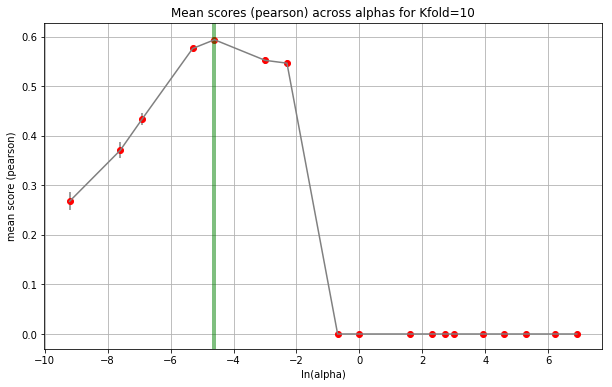

In [530]:
gd.tune_alpha(drugid, alphas=alphas)

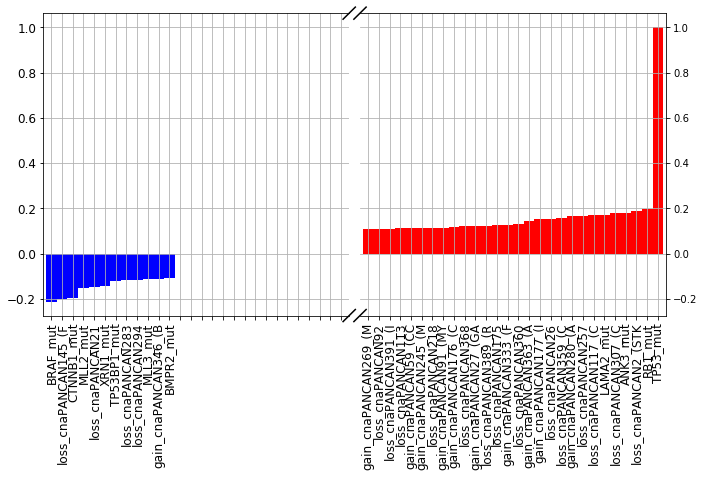

In [10]:
best_model = gd.get_model(alpha=res.alpha)
weights = gd.plot_weight(drugid, best_model)

# Create some toy data set (just one drug)

In [11]:
import pandas as pd

In [312]:
drugid = 1047
Y = ic50.df[drugid].dropna()
X = gf.df.ix[Y.index]

In [313]:
Y.to_csv("data/ic50.csv")
X.to_csv("data/genomic_features.csv")

# The data

We will use Drug response data sets for a set of cancer cell lines

In [374]:
Y = pd.read_csv("data/ic50.csv", header=None, index_col=0)
Y.columns = ['IC50']

and for the same cell lines, a set of genomic features file

In [375]:
X = pd.read_csv("data/genomic_features.csv", index_col=0)

# IC50 data set

In [376]:
Y.head(2)

,IC50
0,
1287381,4.927579
924100,1.710219


<img src="images/drug_response.png">

# Genomic Features

- Mutation
- Methylation
- copy number variation
- ....

<div class="practical">
<h1>Explore the IC50 (Y) and Genomic features data set (X)</h1>
</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc555e2908>]], dtype=object)

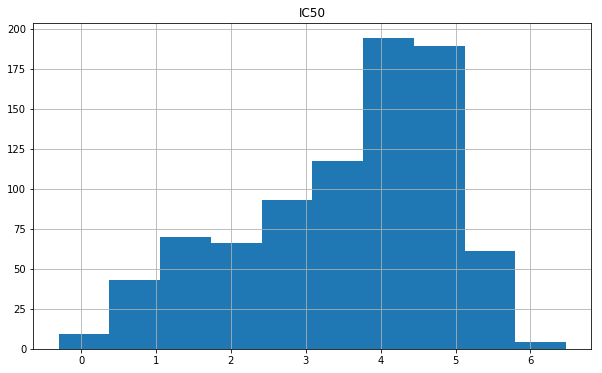

In [377]:
Y.hist()

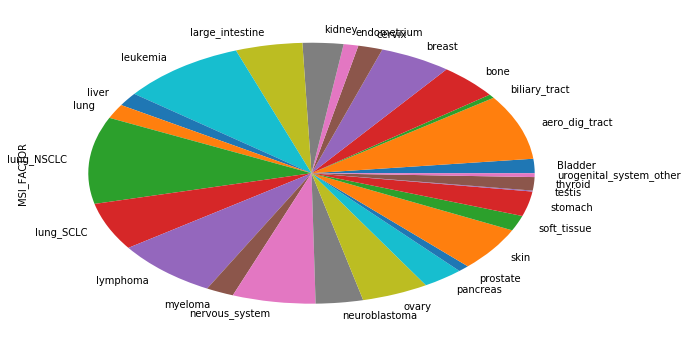

In [378]:
X.groupby('TISSUE_FACTOR').count().MSI_FACTOR.plot.pie()

# Cleaning and preprocessing

In [379]:
# Let us get rid of two columns (TISSUE and MSI)
XX = X.drop(["TISSUE_FACTOR", "MSI_FACTOR"], axis=1)

In [380]:
# Extract the Numpy Array
X = XX.values

In [381]:
Y = Y.values

# The Linear Regression

Here, the model behind the Linear model is complex ! There are 677 features:
    
\begin{equation}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_{676} X_{676} + \beta_{677} X_{677}
\end{equation}

<div class="practical">
<h1>LinearRegression on complex data</h1>
</div>

> - Use the LinearRegression class (see previous notebook) on the $Y$ and $X$ data set
> - Fit the model on all the data
> - What is the coefficient of determination ? 
> - Use the $X$ data to predict the drug response. 
> - Plot the predicted $Y$ versus the $Y$ data . What do you think ?
> - Do we have over fitting ?

0.880258496843


(0, 7)

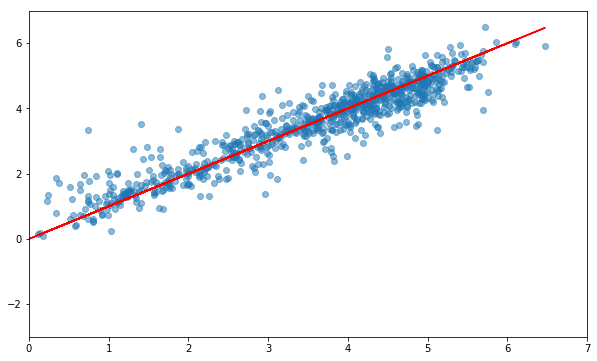

In [383]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
print(model.score(X, Y))
prediction = model.predict(X)
plot(Y, prediction, "o", alpha=0.5)
plot(Y, Y, "r-")
ylim([-3,7]); xlim([0,7])

Remember that we have 877 samples (cell lines) and 677 features. 
Do we have overfitting ? Let us keep 10 values for testing (prediction)

-4.37820471068


(0, 7)

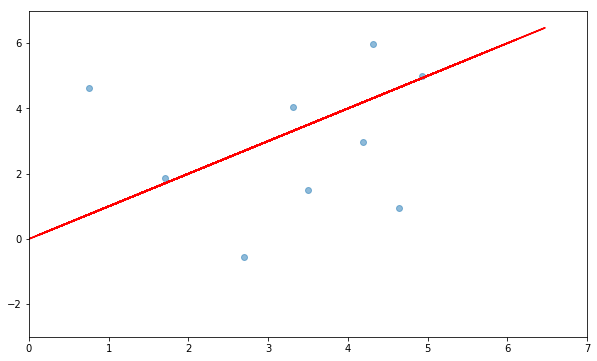

In [385]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(XX[10:], Y[10:])
prediction = model.predict(XX[0:10])  # prediction on 10 points
print(model.score(XX[0:10], Y[0:10])) # score on 10 points
plot(Y[0:10], prediction, "o", alpha=0.5)
plot(Y, Y, "r-"); ylim([-3,7]); xlim([0,7])

# The Ridge Linear regression

In [ ]:
from sklearn.linear_model import Ridge

\begin{equation}
\frac{1}{2N} \Arrowvert{Y - X\beta\Arrowvert}^2_2 
      + \alpha \Arrowvert \beta \Arrowvert_2^2 
\end{equation}

In [395]:
model = Ridge(alpha=50)
model.fit(X, Y)
prediction = model.predict(X)
model.score(X, Y)

0.51380602461384739

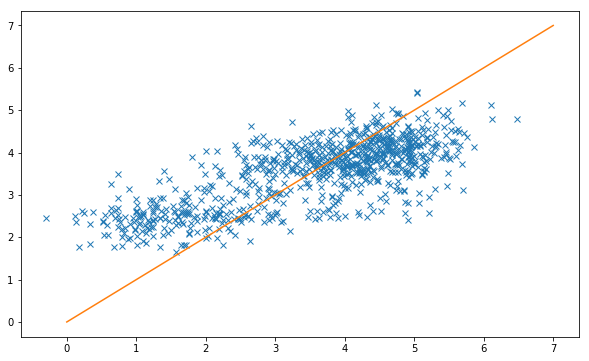

In [398]:
_ = plot(Y, prediction, "x"); plot([0,7], [0,7])

# Behaviour of a given feature

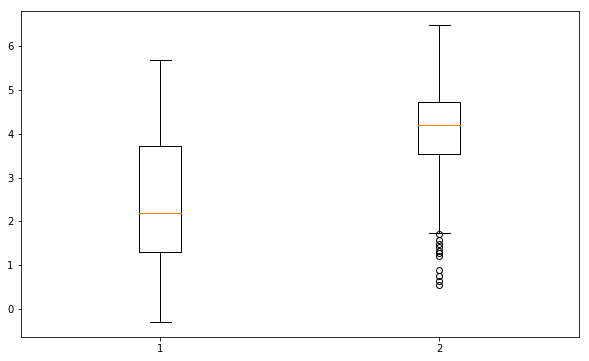

In [416]:
featureID = 248
_ = boxplot([Y[X[:,featureID] == 0],
             Y[X[:,featureID] == 1]])

# K-fold Cross validation

a 10-fold cross validation example:

<img src="images/crossval.png">

In [424]:
from sklearn import model_selection
kfold = model_selection.KFold(5)

In [425]:
for train, test in kfold.split(Y):
    print(len(train), len(test))

676 170
677 169
677 169
677 169
677 169


<div class="practical">
<h1>Cross validation for a given Ridge model</h1>
</div>

> Write a function **training(X, Y, alpha)**  that
> - creates a Ridge estimator
> - Creates a 10-fold object
> - Using the 10-fold object, iterates through the 10 training/test sets and  computes
>   - the fitted model on the training data
>   - predict the Y test given the X test set
>   - Compute the score for the X and Y test set
> - returns the 10 scores as a numpy array
> - Use alpha as a compulsary input parameter used by the Ridge model
> - Test the function with our X, Y data and alpha = 10

In [438]:
def training(X, Y, alpha):
    estimator = Ridge(alpha=alpha)
    scores = []

    kfold = model_selection.KFold(10)
    for train_index, test_index in kfold.split(Y):
        # Create a training set
        X_train = X[train_index]
        X_test = X[test_index]

        # Create a test set
        Y_train = Y[train_index]
        Y_test = Y[test_index]
    
        estimator.fit(X_train, Y_train)
    
        Y_pred = estimator.predict(X_test)
    
        score = estimator.score(X_test, Y_test)
        scores.append(score)
    
    # Returns Rp
    return np.array(scores)

In [436]:
training(X, Y, 10)

array([ 0.27376222,  0.26047308,  0.20206446,  0.38039667,  0.11183632,
        0.19146335, -0.03094006,  0.43868643,  0.19419863,  0.25962467])

<div class="practical">
<h1>Find the value of alpha that maximizes $R^2$</h1>
</div>

> - Vary alpha between 10 and 1000
> - Hints: use logspace function from numpy

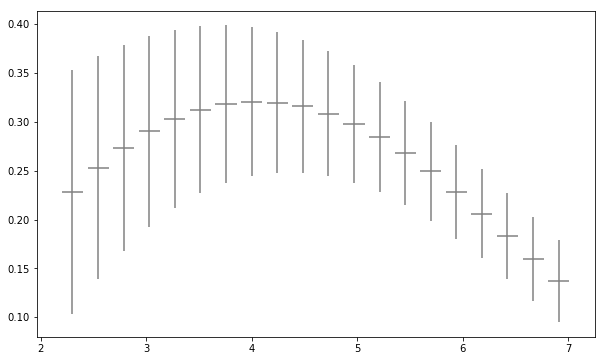

In [453]:
mean_scores = []
for alpha in logspace(1, 3, 20):
    scores = training(X, Y, alpha)
    #print(alpha, log(alpha), mean(scores))
    errorbar(log(alpha), scores.mean(), xerr=0.1, yerr=scores.std(), 
             color="gray")         
    mean_scores.append(scores.mean())

In [452]:
# Find the alpha that maximizes the R^2
logspace(1,3,20)[argmax(mean_scores)]

54.555947811685201

# Automatic K-fold cross validation

In [467]:
from sklearn.linear_model import RidgeCV
from sklearn import model_selection

In [488]:
kfolds=10
kfold_model = model_selection.KFold(kfolds, shuffle=True)
# need to provide alphas, kfolds, l1_ratio for EN and Lasso
alphas = logspace(1, 3, 20)
estimator = RidgeCV(alphas, cv=kfold_model)

In [489]:
estimator.fit(X, Y)

RidgeCV(alphas=array([   10.     ,    12.74275,    16.23777,    20.69138,    26.36651,
          33.59818,    42.81332,    54.55595,    69.51928,    88.58668,
         112.88379,   143.84499,   183.29807,   233.57215,   297.63514,
         379.26902,   483.29302,   615.84821,   784.75997,  1000.     ]),
    cv=KFold(n_splits=10, random_state=None, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [486]:
estimator.alpha_

61.359072734131757

In [492]:
# score returns the R_p^2 coefficient
estimator.score(X, Y)

0.50638823566587732

# Leave One Out Cross Validation

In [495]:
from sklearn import model_selection
loocv = model_selection.LeaveOneOut()

In [497]:
count =0 
for train, test in loocv.split(Y):
    print(len(train), len(test))
    count += 1
    if count == 3:
        break
    

845 1
845 1
845 1


<div class="practical">
<h1>Leave One Out Cross Validation for a given Ridge model</h1>
</div>

> Write a function **loocv(X, Y, alpha)**  that
> - creates a Ridge estimator
> - Creates a LOOCV object
> - Using the LOOCV object, iterates through the 10 training/test sets and  computes
>   - the fitted model on the training data
>   - predict the Y test given the X test set
>   - Compute the score for the X and Y test set
> - returns the 10 scores as a numpy array
> - Use alpha as a compulsary input parameter used by the Ridge model
> - Test the function with our X, Y data and alpha = 10
> - !! R2 on a LOOCV test (1 value) does not work. 

In [508]:
def LOOCV(X, Y, alpha):
    loo = model_selection.LeaveOneOut()
    scores = []
    estimator = Ridge(alpha=alpha)
    for train_index, test_index in loo.split(XX):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        estimator.fit(X_train, Y_train)
        Ypred = estimator.predict(X_test)
        scores.append(sqrt((Ypred - Y_test)**2)[0])
        if len(scores) > 100:
            break
    return scores

In [509]:
scores = LOOCV(X, Y, 5)
mu, sigma = mean(scores), std(scores)

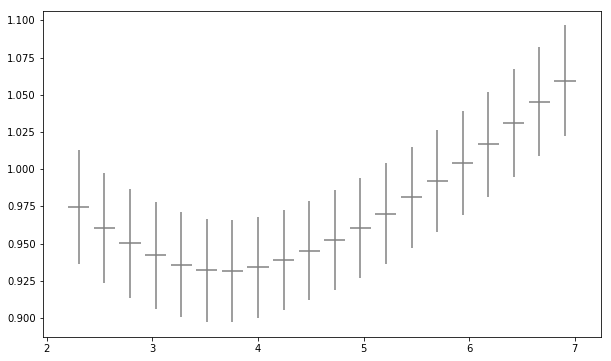

In [511]:
mean_scores = []
for alpha in logspace(1, 3, 20):
    scores = LOOCV(X, Y, alpha)
    # print(alpha, log(alpha), mean(scores))
    errorbar(log(alpha), mean(scores), xerr=0.1, yerr=std(scores)/20, 
             color="gray") 
    mean_scores.append(mean(scores))

In [513]:
# Find the alpha that maximizes the R^2
logspace(1,3,20)[argmin(mean_scores)]

42.813323987193932

# Automatic Leave One Out Cross Validation

In [519]:
alphas = logspace(1, 3, 20)
estimator = RidgeCV(alphas, cv=None)
estimator.fit(X, Y)
estimator.alpha_

69.519279617756055

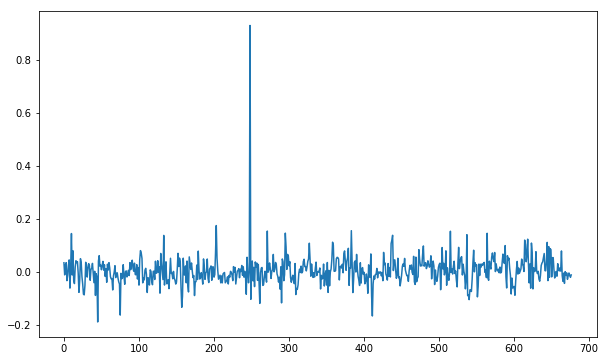

In [521]:
plot(estimator.coef_.T)

# Lasso 


\begin{equation}
\frac{1}{2N} \Arrowvert{Y - X\beta\Arrowvert}^2_2 
      + \alpha   \Arrowvert \beta \Arrowvert_1
\end{equation}

In [543]:
from sklearn.linear_model import LassoCV
estimator = LassoCV(n_alphas=100)
estimator.fit(X, Y[:,0])
estimator.alpha_

/home/cokelaer/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.010865823423321284

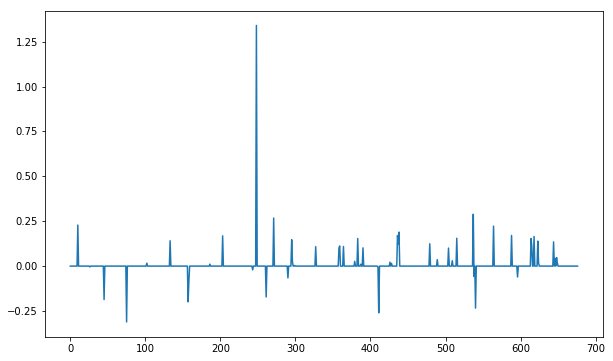

In [544]:
plot(estimator.coef_)

In [545]:
sum(abs(estimator.coef_) > 0)

53

# Elastic Net CV


\begin{equation}
\frac{1}{2N} \Arrowvert{Y - X\beta\Arrowvert}^2_2 
    + \alpha \rho \Arrowvert \beta \Arrowvert_1
    + \frac{\alpha (1-\rho)}{2} \Arrowvert \beta \Arrowvert_2^2 
\end{equation}


In [546]:
from sklearn.linear_model import ElasticNetCV
estimator = ElasticNetCV(l1_ratio=0.5, n_alphas=100)
estimator.fit(X, Y[:,0])


ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [547]:
estimator.alpha_

0.020267006582463033

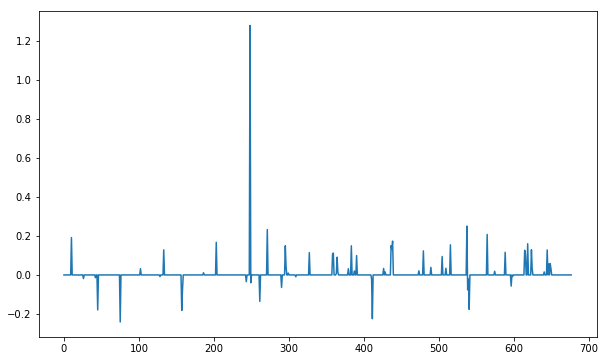

In [549]:
plot(estimator.coef_)

In [548]:
sum(abs(estimator.coef_) > 0)

65

1. Lasso does a sparse selection, while Ridge does not.
2. When you have highly-correlated variables, Ridge regression shrinks the two coefficients towards one another. Lasso is somewhat indifferent and generally picks one over the other. Depending on the context, one does not know which variable gets picked. Elastic-net is a compromise between the two that attempts to shrink and do a sparse selection simultaneously.
3. Ridge estimators are indifferent to multiplicative scaling of the data. That is, if both X and Y variables are multiplied by constants, the coefficients of the fit do not change, for a given λ
parameter. However, for Lasso, the fit is not independent of the scaling. In fact, the λ parameter must be scaled up by the multiplier to get the same result. It is more complex for elastic net.
4. Ridge penalizes the largest β 's more than it penalizes the smaller ones (as they are squared in the penalty term). Lasso penalizes them more uniformly. This may or may not be important. In a forecasting problem with a powerful predictor, the predictor's effectiveness is shrunk by the Ridge as compared to the Lasso.